In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

Text(0.5, 0, 'Time')

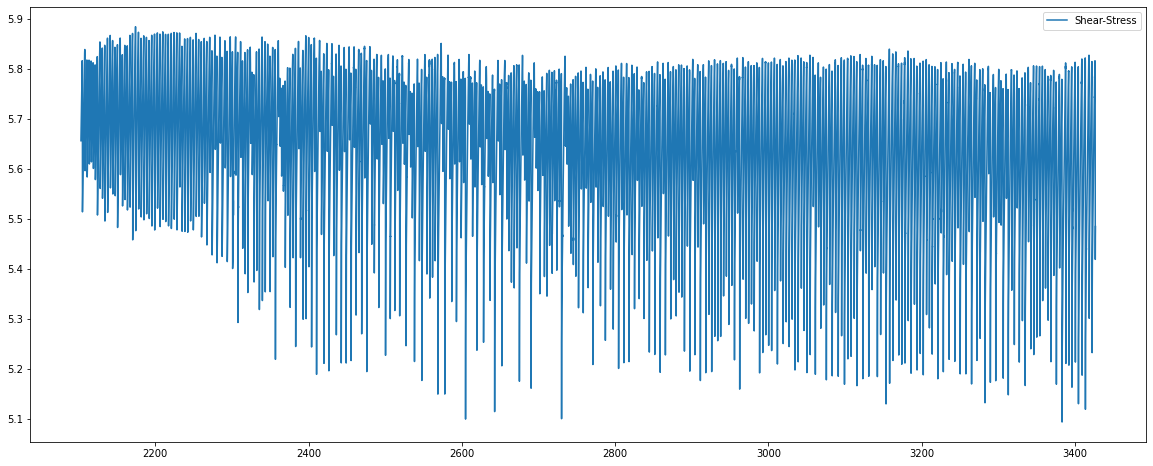

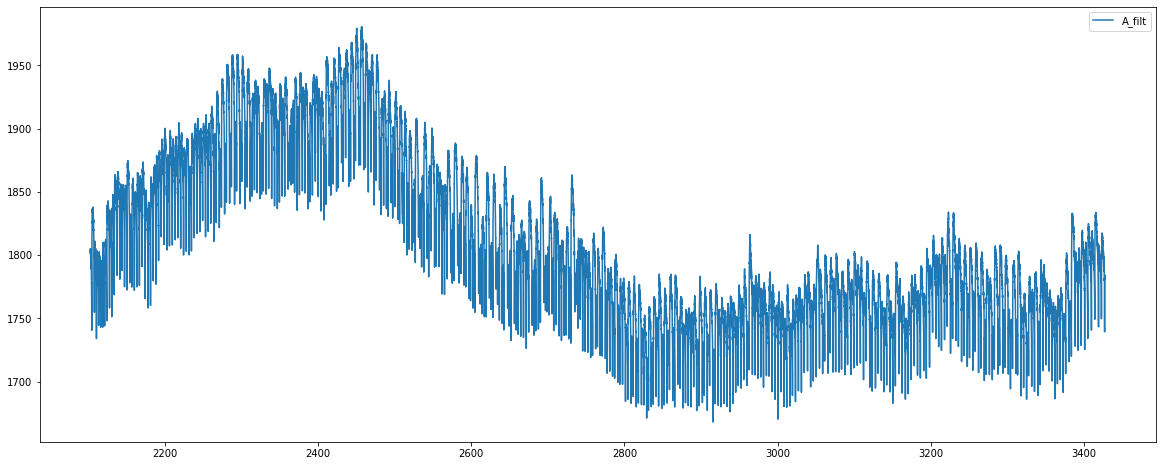

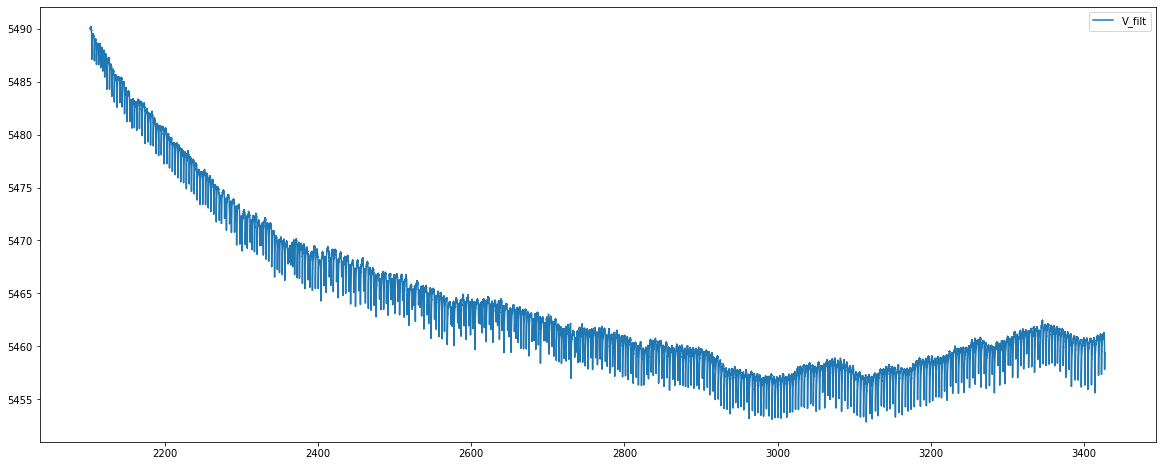

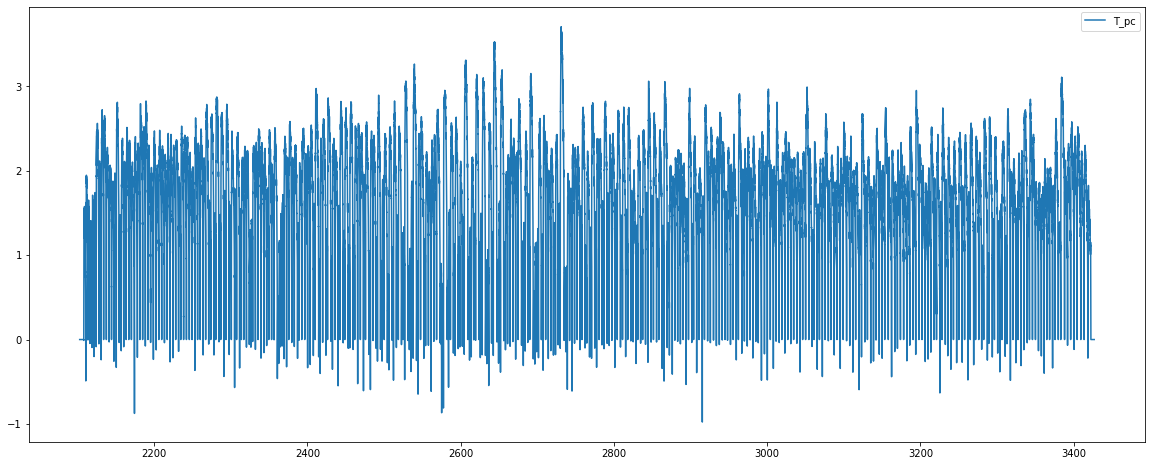

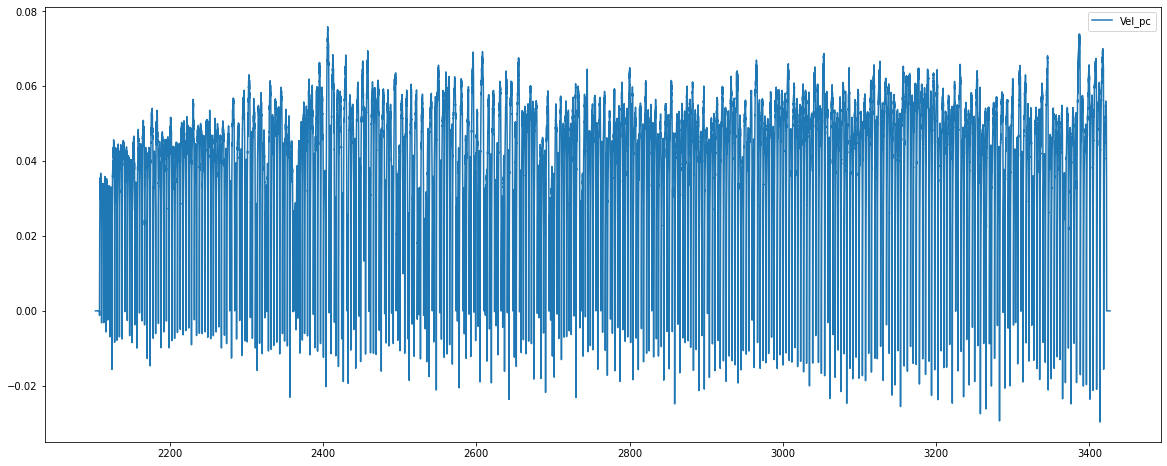

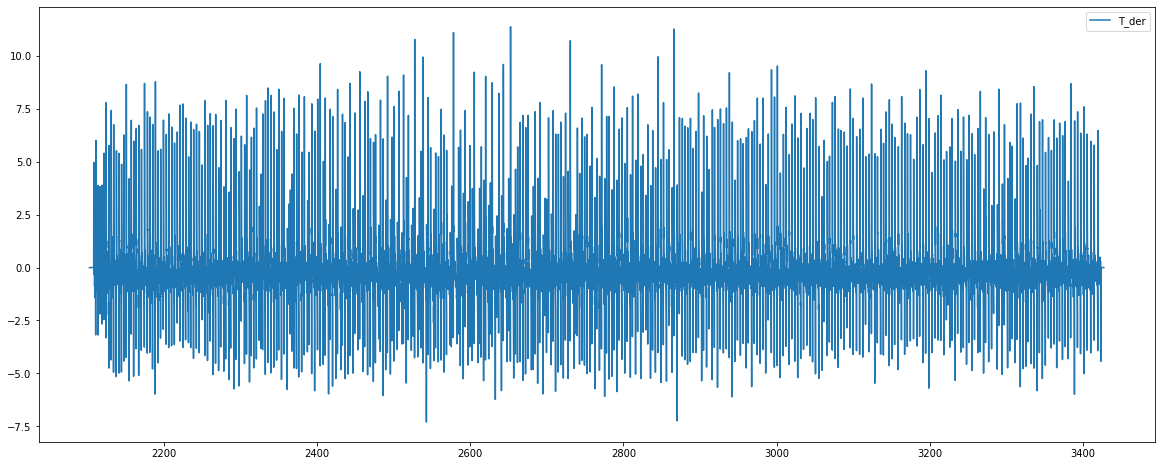

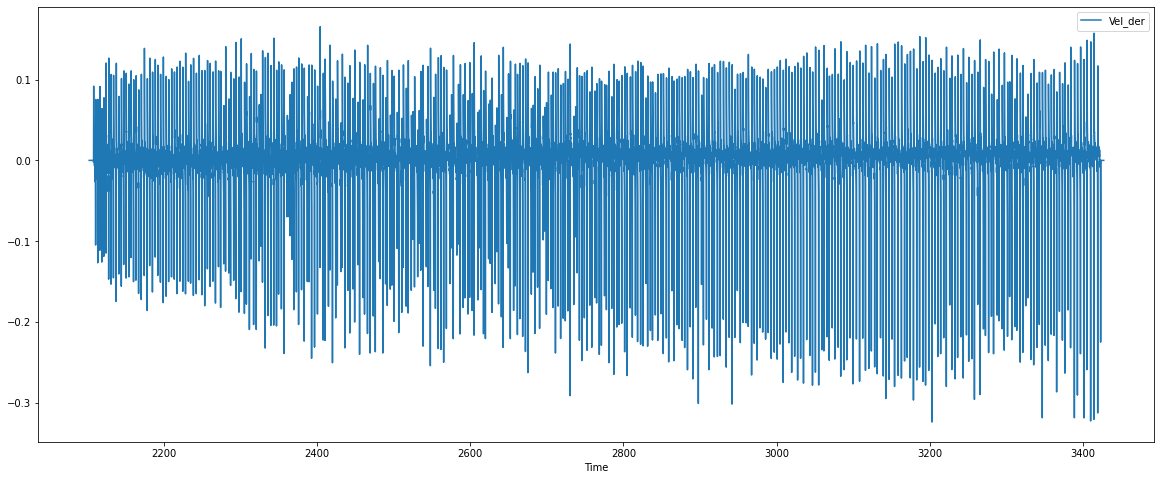

In [3]:
data = loadmat('/content/drive/My Drive/Colab Notebooks/Labquake_prediction/MLpreprocessed_code/data/p5270_ML_Master.mat')

m_t = pd.DataFrame({'Time':data['Time'].ravel().round(2), 'SS':data['SS'].ravel()})    # TTF and TSF not used
a_t = pd.DataFrame({'Time':data['LocalAcTime'].ravel().round(2), 'A_filt':data['A_filt'].ravel(), 'V_filt':data['V_filt'].ravel(),
                    'T_pc':data['T_pc'].ravel(), 'Vel_pc':data['Vel_pc'].ravel(), 'T_der':data['T_der'].ravel(), 'Vel_der':data['Vel_der'].ravel()})  # 7 features
                   # 'T_off':data['T_off'].ravel(), 'Vel_off':data['Vel_off'].ravel()})   
df = a_t.merge(m_t, on='Time')


fig = plt.figure(1, figsize=(20,8))
plt.plot(df['Time'], df['SS'], label='Shear-Stress')
plt.legend()

fig = plt.figure(2, figsize=(20,8))
plt.plot(df['Time'], df['A_filt'], label='A_filt')
plt.legend()

fig = plt.figure(3, figsize=(20,8))
plt.plot(df['Time'], df['V_filt'], label='V_filt')
plt.legend()

fig = plt.figure(4, figsize=(20,8))
plt.plot(df['Time'], df['T_pc'], label='T_pc')
plt.legend()

fig = plt.figure(5, figsize=(20,8))
plt.plot(df['Time'], df['Vel_pc'], label='Vel_pc')
plt.legend()

fig = plt.figure(6, figsize=(20,8))
plt.plot(df['Time'], df['T_der'], label='T_der')
plt.legend()

fig = plt.figure(7, figsize=(20,8))
plt.plot(df['Time'], df['Vel_der'], label='Vel_der')
plt.legend()
plt.xlabel('Time')
